# 🚘 Analyzing SF traffic stops with `R`: Part 2

<img src="img/sf-traffic-2.jpg" alt="traffic" width="400" align="left"/>

This is Part 2. Other parts can be found [here](https://www.jdgrossman.com).

## Introduction

In this series of tutorials, we'll use `R` to explore traffic stops in San Francisco (SF). In particular, we'll investigate whether there is evidence of racial discrimination in SF's policing practices. 

> **Important note**: Policing can be a sensitive subject. It's important to remember that each row in our data represents a real interaction between a police officer and driver. Please keep this in mind as you work through the tutorial, and be sure to engage with the material to the extent you're comfortable. 

By the end of the tutorials, you'll have foundational understanding of the following:
1. 📊 How to use `R` to explore tabular data and calculate descriptive statistics. 
2. 📈 How to make an informative plot with `R`
2. ⚖️ How to approach questions about social policy with data. 

Let's get started!

## ✅ Set up

While the core `R` language contains many useful functions (e.g., `sum` and `sample`), there is vast functionality built on top of `R` by community members.

Make sure to run the cell below. It imports additional useful functions, adjusts `R` settings, and loads in data. 

In [1]:
# Load in additional functions
library(tidyverse)
library(lubridate)

# Use three digits past the decimal point
options(digits = 3)

# This makes our plots look nice!
theme_set(theme_bw())

# Read in the data
stops <- read_rds("data/sf_stop_data.rds")

# Data modifications from Part 1
stops_w_yr = stops %>% 
    mutate(
        yr = year(date),
        age_first_digit = as.character(floor(age/10))
    )

── Attaching packages ────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ───────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### 📊 Why do we need plots?

In Part 1, we used the `count()` function to count the number of stops in each year:

In [2]:
n_stops_by_year = count(stops_w_yr, yr)
n_stops_by_year

yr,n
<dbl>,<int>
2009,110269
2010,104254
2011,99476
2012,82362
2013,74144
2014,39752
2015,85689
2016,40215


If you stare at the table for a moment 👀, you may notice a few things:
- Stops appear to decrease over the years
- 2014 and 2016 appear to have fewer stops than we might expect

Let's try a similar exercise, but with more data:

In [3]:
n_stops_by_age_by_year = count(stops_w_yr, yr, age_first_digit)
n_stops_by_age_by_year

yr,age_first_digit,n
<dbl>,<chr>,<int>
2009,1,4052
2009,10,2
2009,2,34907
2009,3,27664
2009,4,20548
2009,5,14057
2009,6,5735
2009,7,1565
2009,8,410


# 🙄

It would take a long time to discover any meaningful patterns from this table.

With a plot, patterns can emerge almost instantly. Try running the code below.

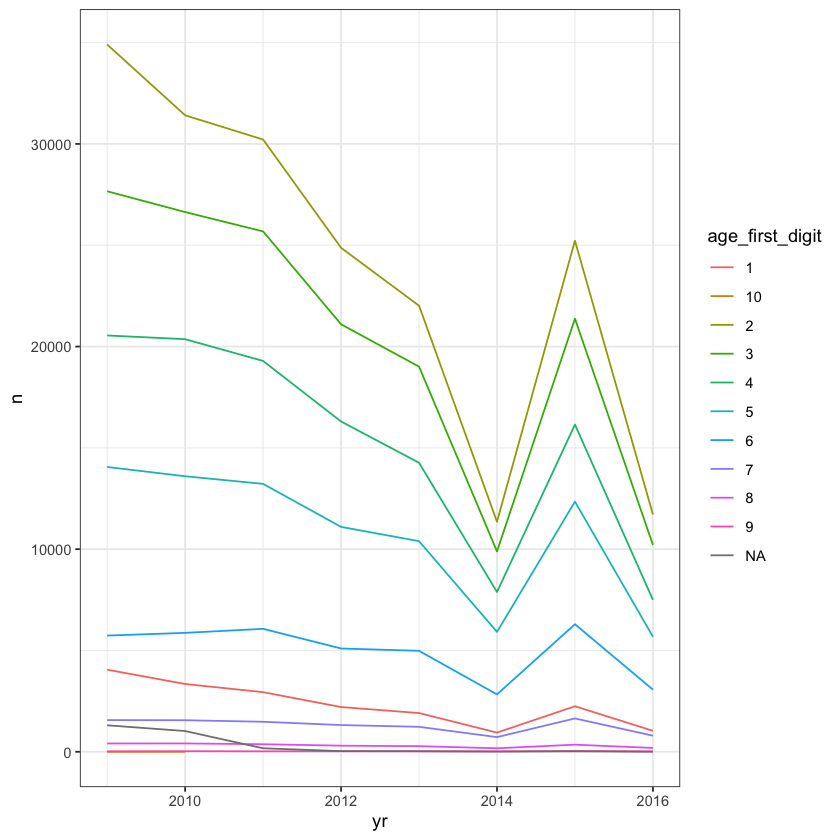

In [4]:
ggplot(n_stops_by_age_by_year, aes(x=yr, y=n, color=age_first_digit)) +
    geom_line()

# 😌 

Plots reduce the **cognitive burden** of gleaning insights from text. 

> According to a classic [research paper](https://brendans-island.com/blogsource/20170523-Documents/20170603-8611.pdf), humans can process images **60,000** times faster than text.

By the end of this tutorial, you'll be able to make clean and effective plots with `R`.

## ⚙️ The mechanics of `ggplot2`

`ggplot2` is a popular and flexible `R` package for plotting. 

To make a basic plot, this all you have to tell `ggplot2`:
- What data should be used?
- What kind of plot would you like (e.g., bar chart, line graph, or histogram)?
- Which columns should be plotted?

Let's see this in action with the `n_stops_by_year` table:

In [5]:
n_stops_by_year

yr,n
<dbl>,<int>
2009,110269
2010,104254
2011,99476
2012,82362
2013,74144
2014,39752
2015,85689
2016,40215


`ggplot2` in action:

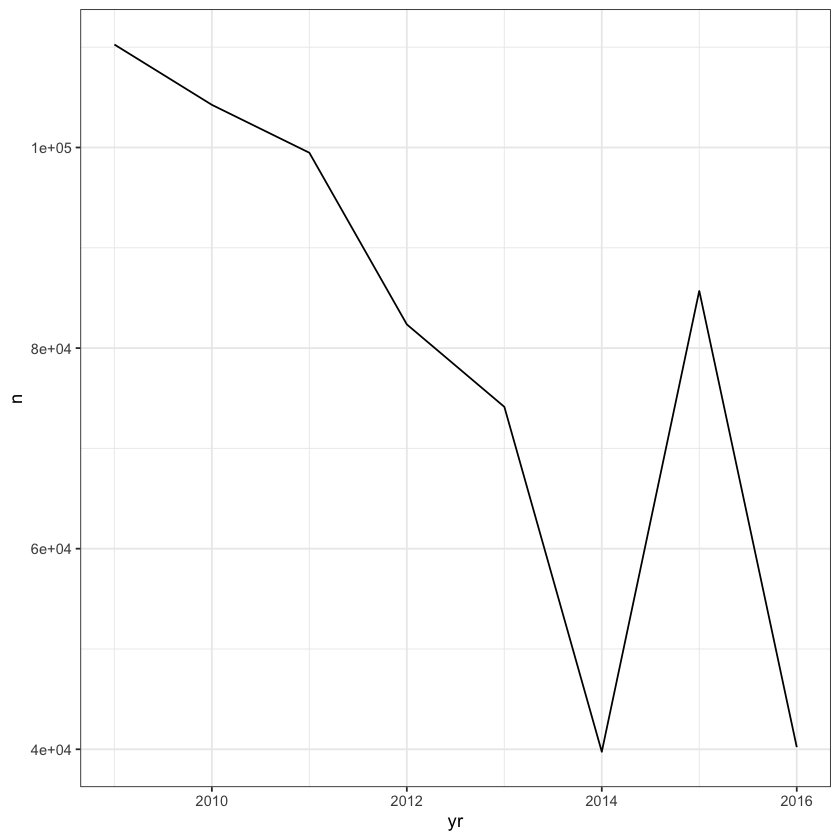

In [6]:
# First argument: the data
# Second argument: the columns to plot on each axis
ggplot(n_stops_by_year, aes(x = yr, y = n)) + 

    # Here's where we specify the plot type
    geom_line() 

🛠️ Let's break down each piece:

1. The `ggplot()` function **initializes** a blank plot.

2. `n_stops_by_year` is our data.

3. The `aes()` function makes a **mapping** between columns and **aesthetics** (i.e., features) of our plot.

4. `aes(x = yr, y = n)` tells `ggplot2` that we should plot the `yr` column on the x-axis, and the `n` column on the y-axis.

5. The addition (`+`) of `geom_line` tells `ggplot2` to construct a line graph.

❗❗Important note❗❗: `ggplot2` uses addition `+` instead of the pipe `%>%` to chain functions. 

> 🏛️ This is for historical reasons: `ggplot2` was created before the pipe `%>%`!

## 🚀 Exercise

1. Modify the plotting code to create a bar chart, a scatterplot, and a smoothed curve. 

> You may find the functions `geom_col()`, `geom_point()`, and `geom_smooth()` helpful.

2. Try adding more than one `geom` function to your code. What happens?

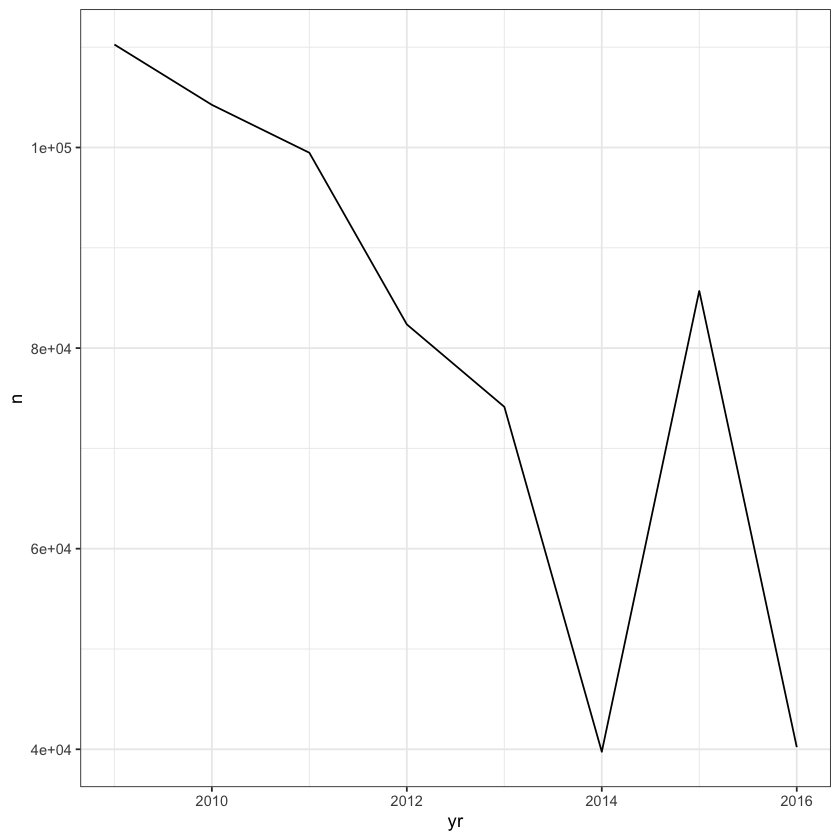

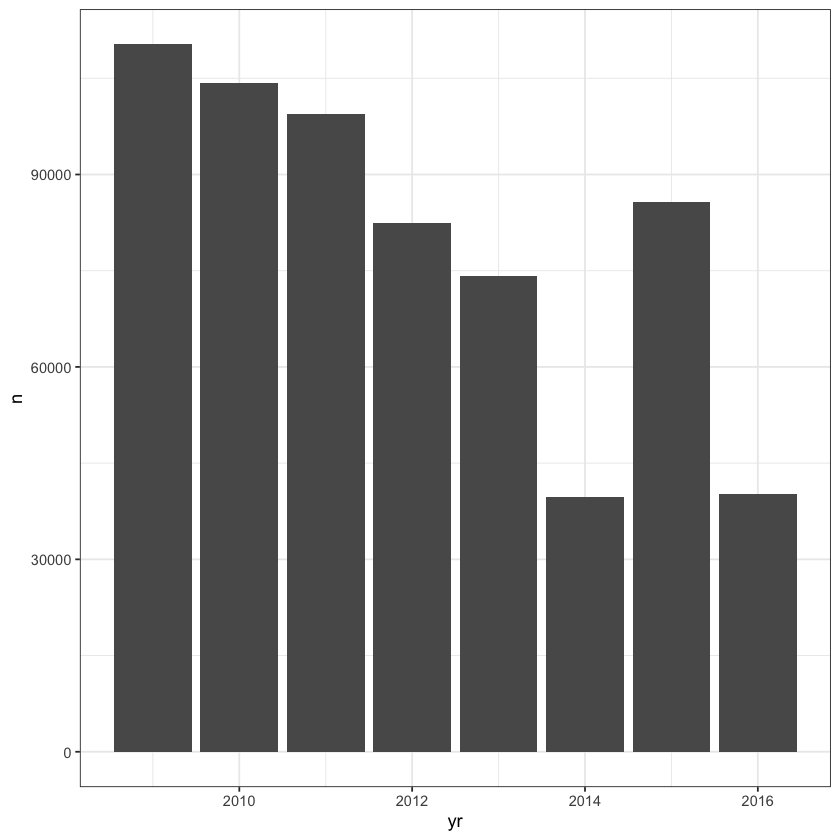

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



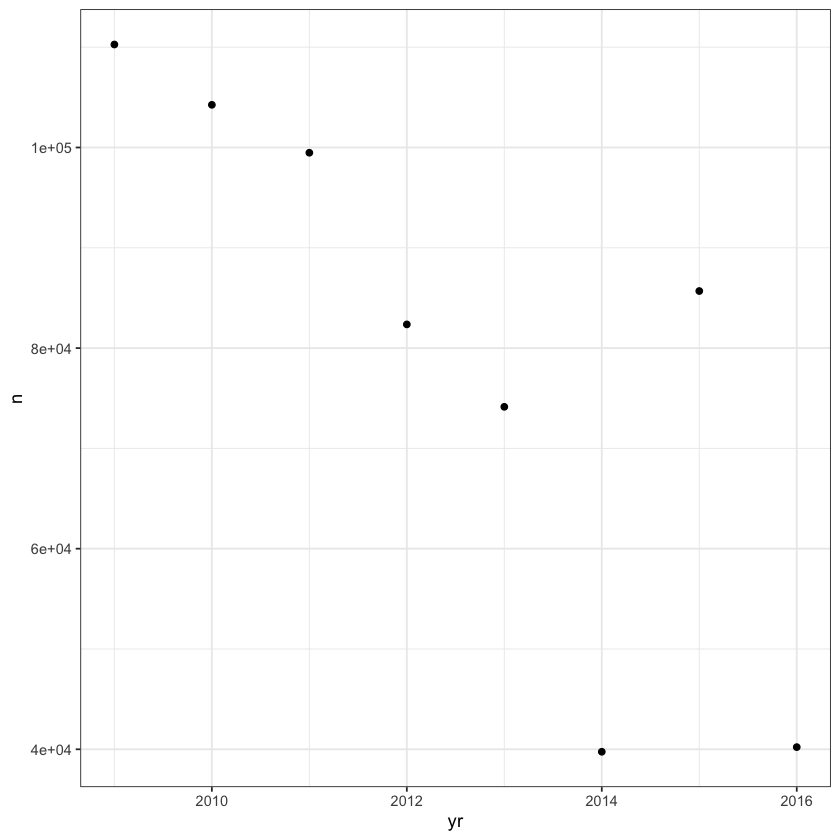

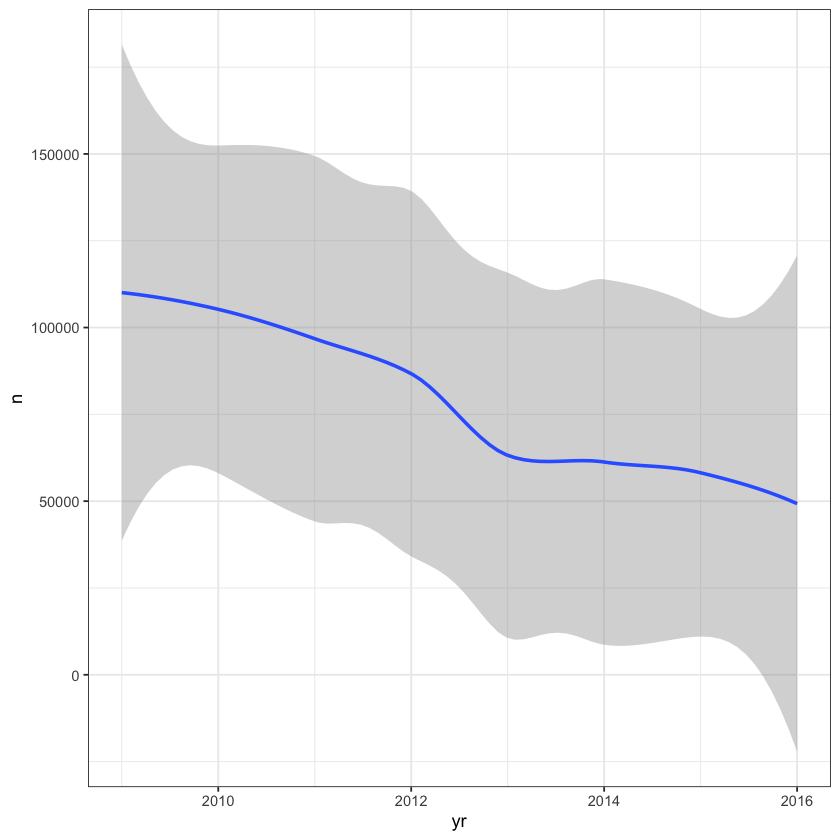

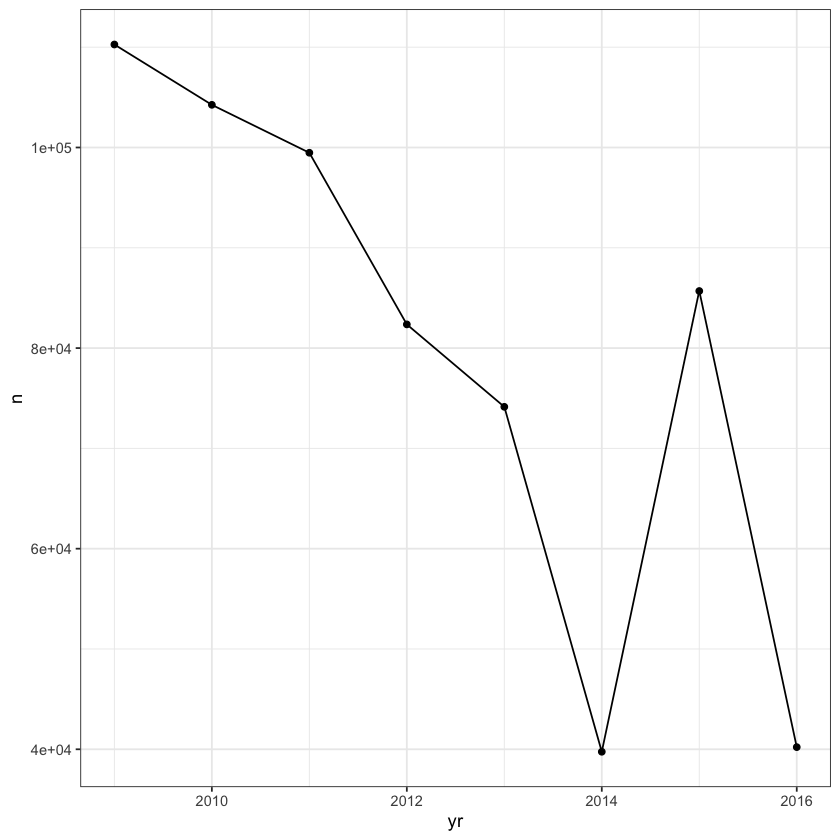

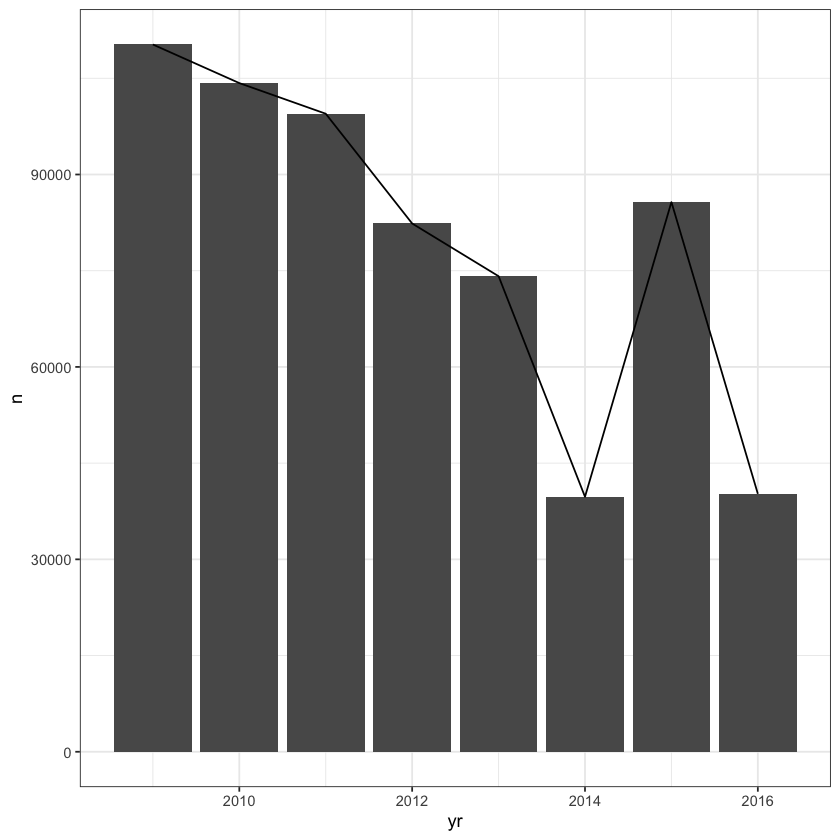

In [7]:
# First argument: data
# Second argument: columns to plot on each axis
ggplot(n_stops_by_year, aes(x = yr, y = n)) + 

    # Here's where we specify the plot type
    geom_line() 

# START

# 1.

ggplot(n_stops_by_year, aes(x = yr, y = n)) + 
    geom_col()

ggplot(n_stops_by_year, aes(x = yr, y = n)) + 
    geom_point()

ggplot(n_stops_by_year, aes(x = yr, y = n)) + 
    geom_smooth()

# 2. The geometries are layered on top of one another!

ggplot(n_stops_by_year, aes(x = yr, y = n)) + 
    geom_line() +
    geom_point()

ggplot(n_stops_by_year, aes(x = yr, y = n)) + 
    geom_col() +
    geom_line()

# END

## 🎨 Adding <font color="red">c</font><font color="blue">o</font><font color="green">l</font><font color="orange">o</font><font color="purple">r</font> to our plot

So far, we've used two columns from our data. So, our plots are 2-dimensional (2D). 

How could we show data from more than one column?
- Number of stops **by race** for each year
- Number of stops **by gender** for each year
- Number of stops **by age** for each year

One option is a [3D plot](https://c3d.libretexts.org/CalcPlot3D/index.html). They exist, but they can be hard to read, and hard to generate. 

> 📰 For example, how would you put a 3D plot on the cover of the New York Times?

How can we add dimensions while keeping our plot 2D? ☀️<font color="red">C</font><font color="blue">O</font><font color="green">L</font><font color="orange">O</font><font color="purple">R</font> ☀️! Or anything else from this list:

- 〰️ Linetype (e.g. dotted or dashed)
- 📈 📉 Multiple 2D plots
- ⚫ Point size 
- And more!

Here's the example from earlier:

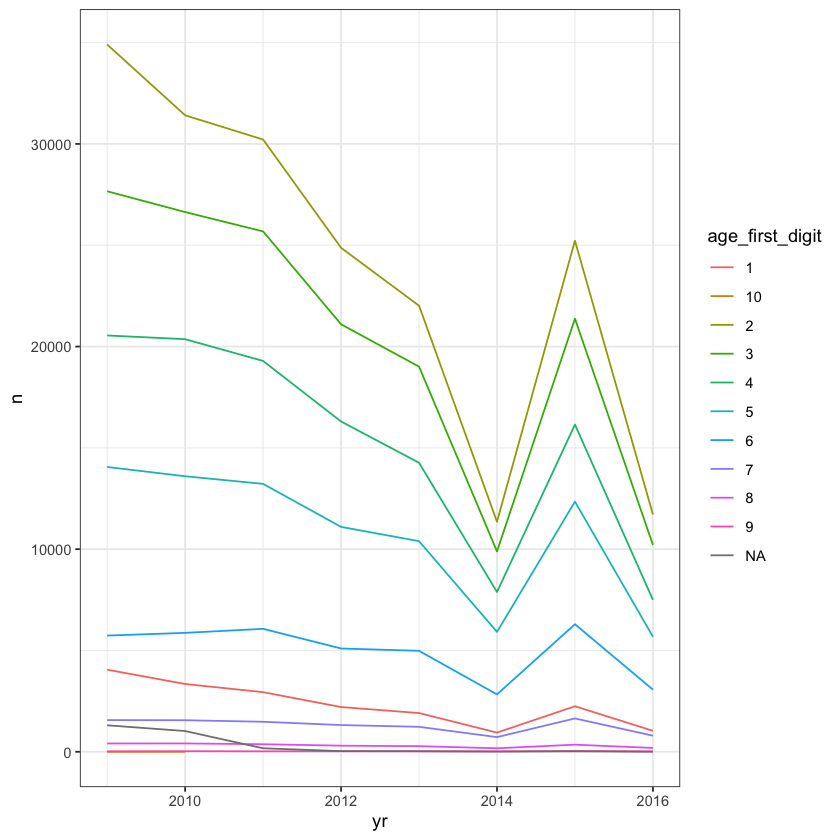

In [8]:
# Change 1: New data. `n_stops_by_age_by_year` was the super long table.
# Change 2: We added `color = age_first_digit`.
ggplot(n_stops_by_age_by_year, aes(x=yr, y=n, color=age_first_digit)) +
    geom_line()

## 🚀 Exercise

1. Modify the plotting code to create a <font color="red">c</font><font color="blue">o</font><font color="green">l</font><font color="orange">o</font><font color="purple">r</font><font color="pink">e</font><font color="brown">d</font> bar chart, scatterplot, and smoothed curve. 

> Think about which type of plot is most informative, and which one is least informative.

2. Instead of mapping `color` to `age_first_digit`, try the following mappings:

- `linetype` to `age_first_digit`

- `fill` to `age_first_digit`

Note: Some mappings may give you errors with certain `geom`'s. For example, does `linetype` make sense for a scatterplot?

3. Make a line chart, but map `color` to `age_first_digit` **and** map `linetype` to `age_first_digit`. What happens?



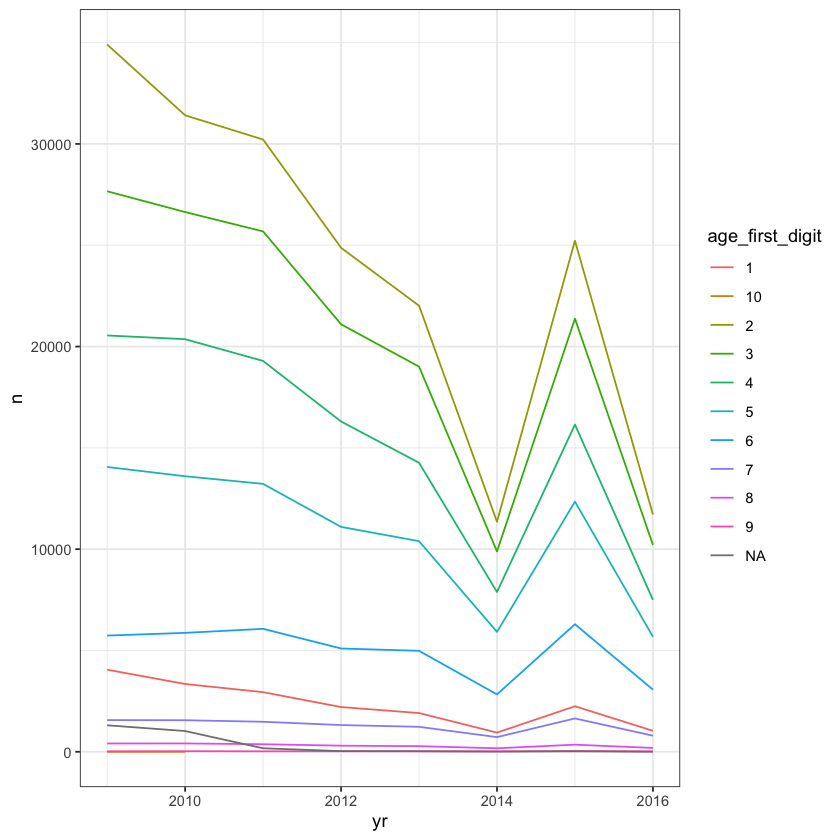

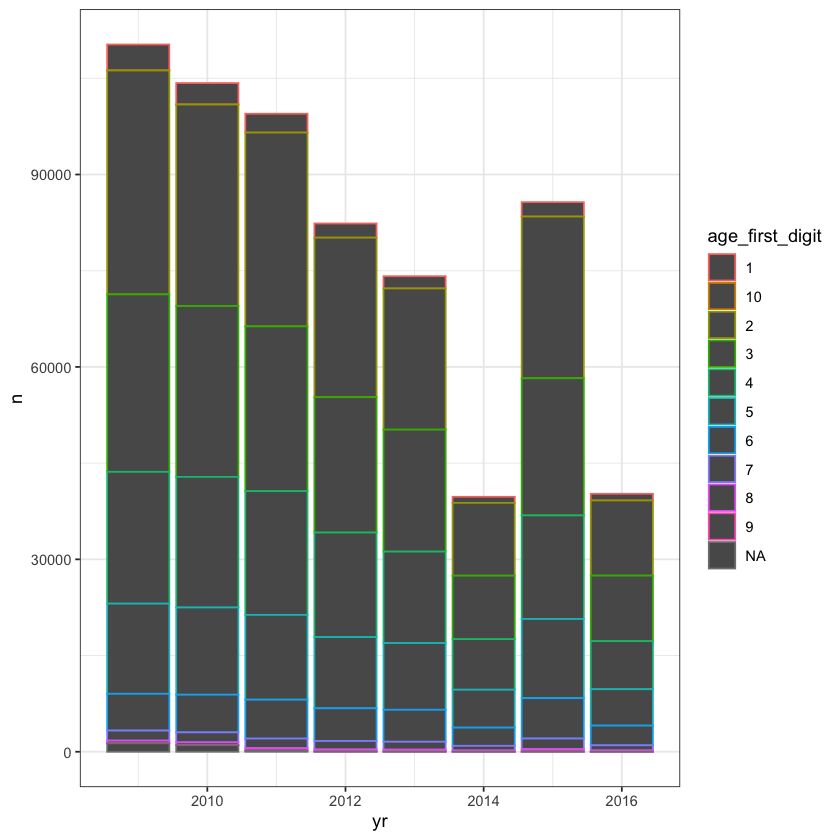

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  2009”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“radius  2.5e-05”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“all data on boundary of neighborhood. make span bigger”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2009”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametr

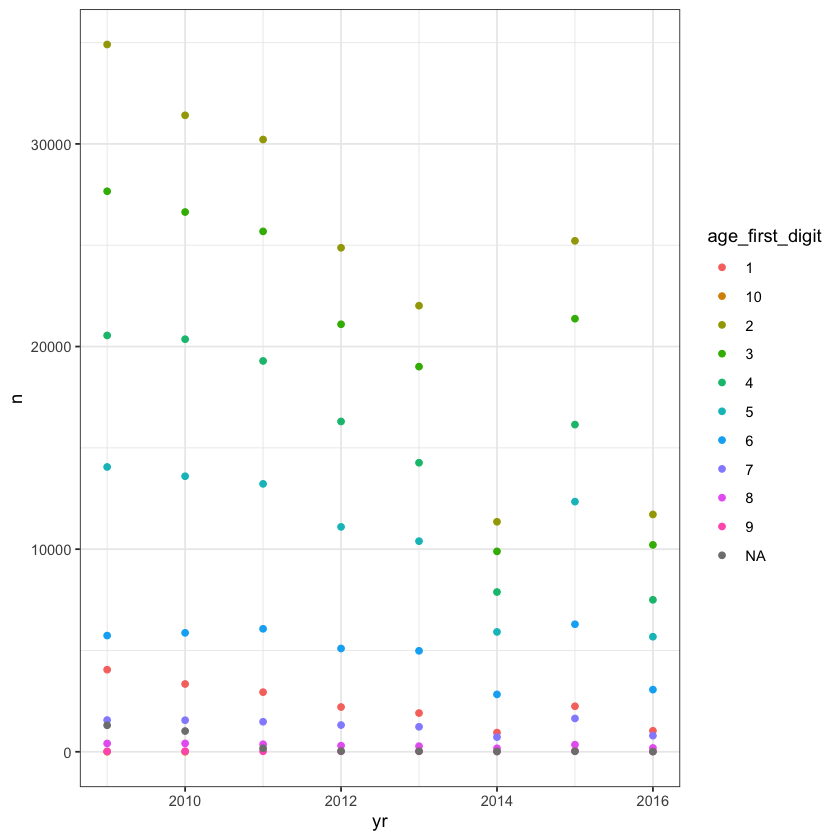

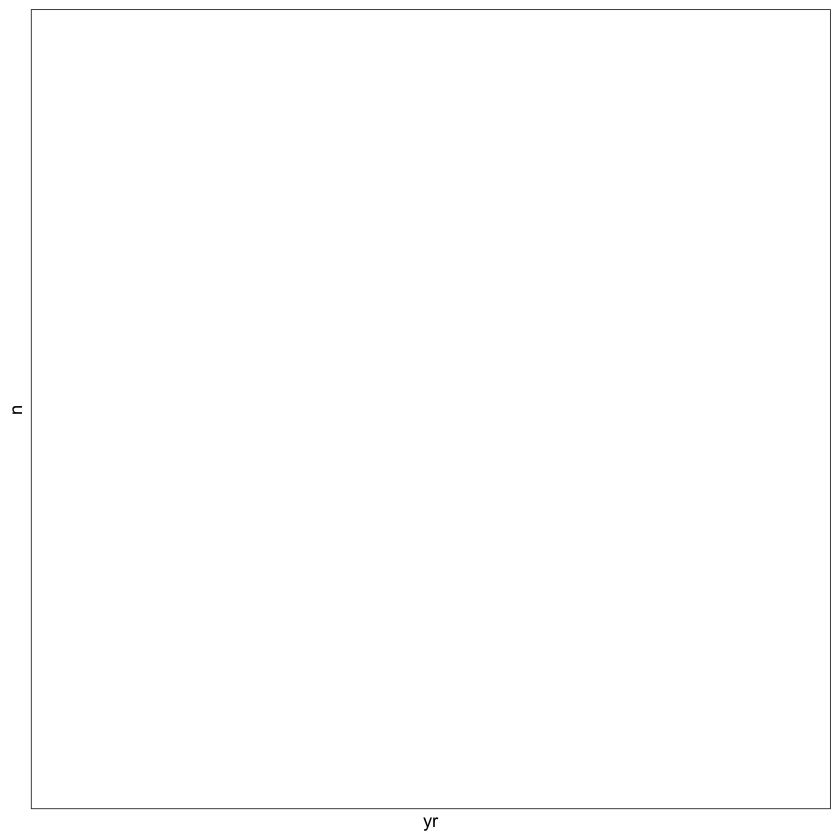

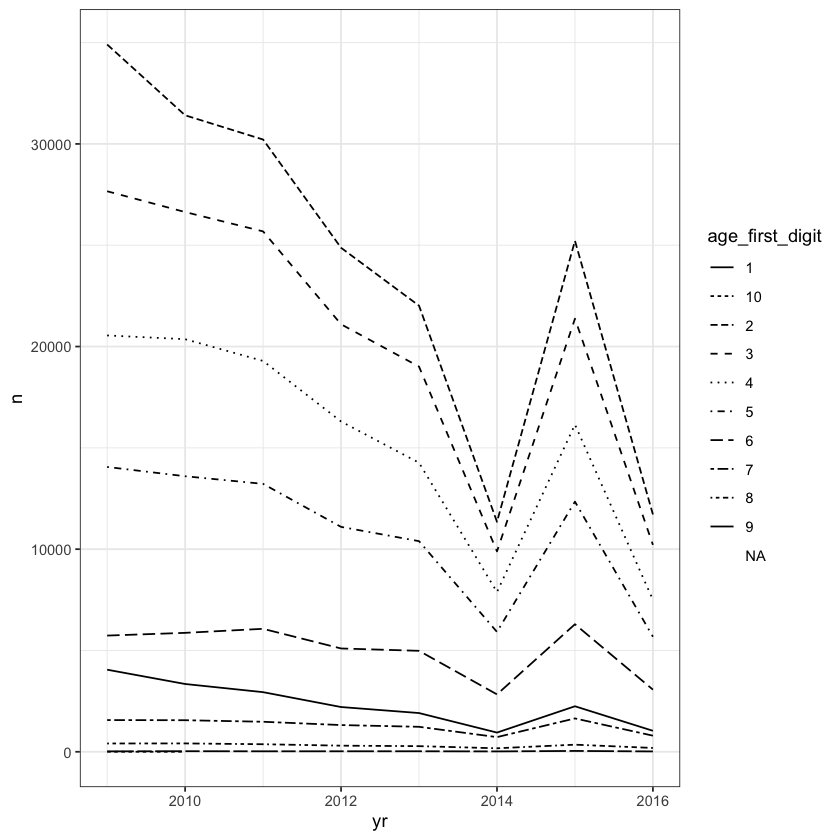

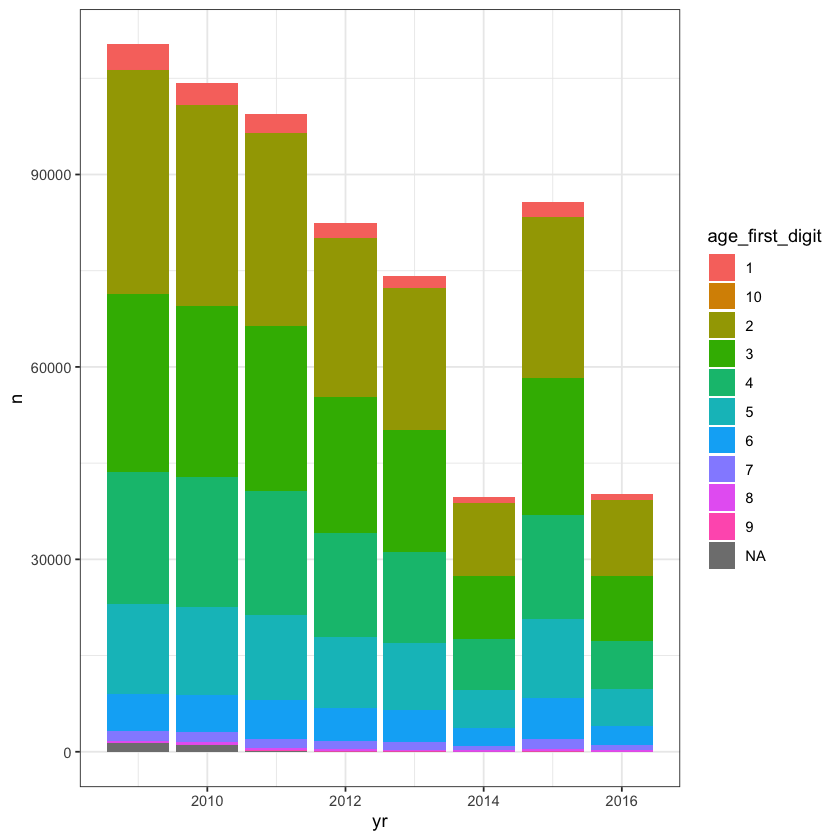

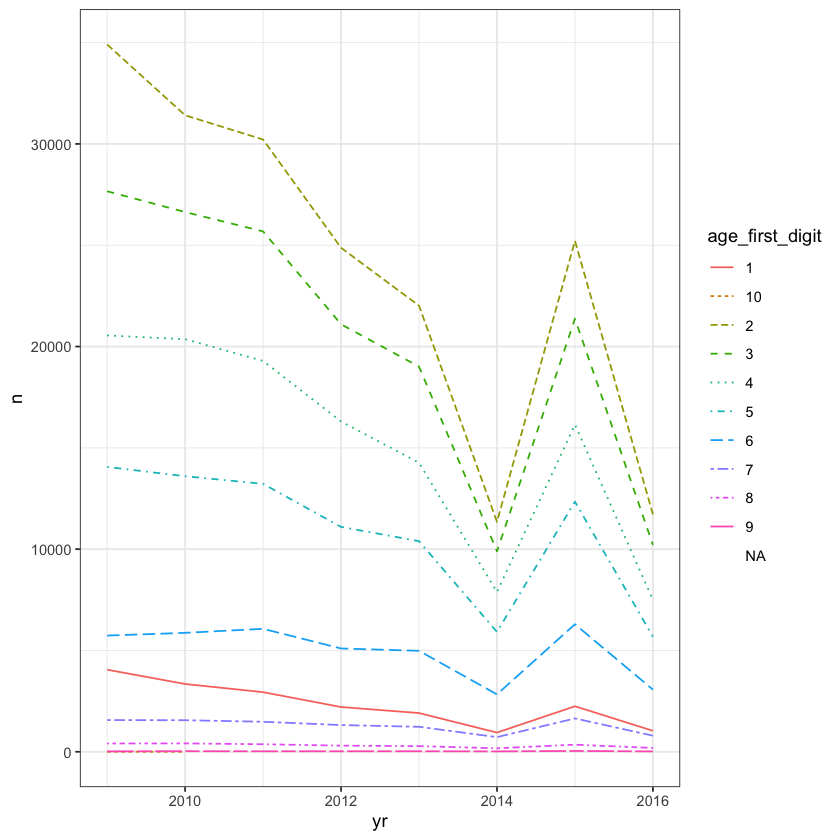

In [9]:
ggplot(n_stops_by_age_by_year, aes(x=yr, y=n, color=age_first_digit)) +
    geom_line()

# START

# 1. The bar chart and scatterplots are hard to read. Line plot is better.

ggplot(n_stops_by_age_by_year, aes(x=yr, y=n, color=age_first_digit)) +
    geom_col()

ggplot(n_stops_by_age_by_year, aes(x=yr, y=n, color=age_first_digit)) +
    geom_point()

ggplot(n_stops_by_age_by_year, aes(x=yr, y=n, color=age_first_digit)) +
    geom_smooth()

# 2. 

# After two or three linetypes, it becomes hard to distinguish the lines from
# one another. But, this is great when you can only print in black and white.
ggplot(n_stops_by_age_by_year, aes(x=yr, y=n, linetype=age_first_digit)) +
    geom_line()

# It looks like `fill` controls the color of the bars, while
# `color` controls the outline.
ggplot(n_stops_by_age_by_year, aes(x=yr, y=n, fill=age_first_digit)) +
    geom_col()

# 3. 

# Each line gets its own color AND linetype. 
ggplot(n_stops_by_age_by_year, aes(x=yr, y=n, color=age_first_digit, linetype=age_first_digit)) +
    geom_line()


# END

## Concluding thoughts

`ggplot2` has many additional features and [extension packages](https://exts.ggplot2.tidyverse.org/gallery/) for making useful plots.

> You can see cool examples of all chart types on [this website](https://r-graph-gallery.com/scatterplot.html).

Here are some ways we could clean up our colored line plot to make it more informative:

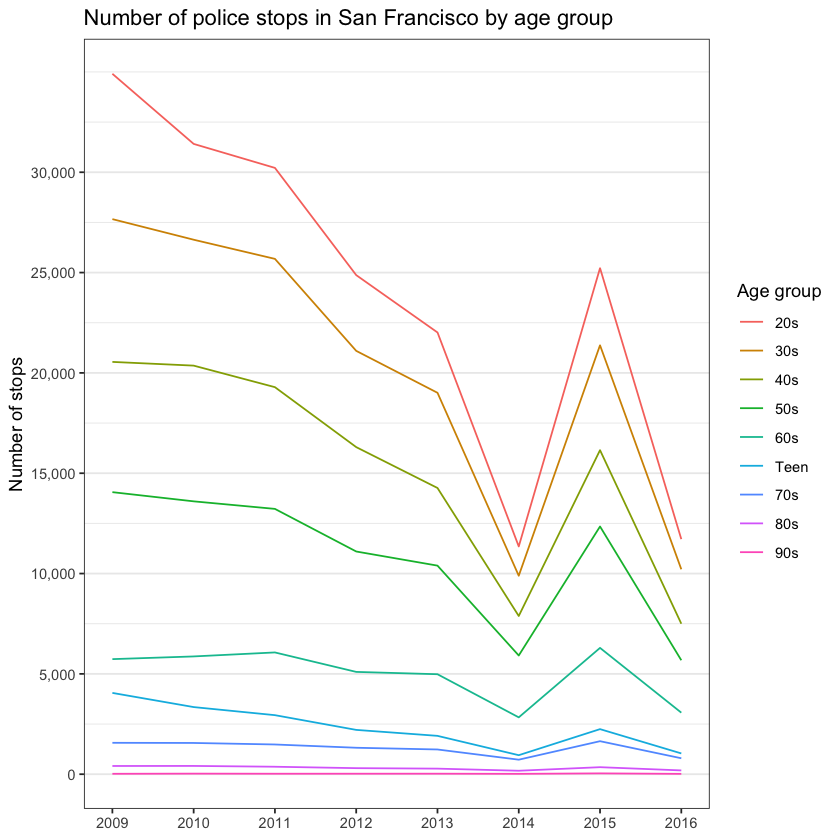

In [10]:
# Data modifications
n_stops_by_age_by_year %>%
    # Remove unknown ages and ages >= 100
    filter(age_first_digit %in% as.character(1:9)) %>%
    arrange(desc(n)) %>%
    mutate(
        # 1 --> 10s, 2 --> 20s, ...
        age_first_digit = str_c(age_first_digit, '0s'),
        # 10s --> Teen
        age_first_digit = str_replace_all(age_first_digit, '10s', 'Teen'),
        # Sort the age groups by how often they are stopped for the legend
        age_first_digit = factor(age_first_digit, levels=unique(age_first_digit))
    ) %>%
    # ^ Piping the new data into ggplot with the pipe (%>%)
    ggplot(aes(x=yr, y=n, color=age_first_digit)) +
        geom_line() +
        # Remove the label from the x axis, and show all the years
        scale_x_continuous(
            name=NULL,
            labels=2009:2016,
            breaks=2009:2016
        ) +
        # Label the y axis, and add commas to the counts
        scale_y_continuous(
            name="Number of stops",
            labels=scales::comma_format(accuracy = 1),
            breaks=seq(0, 30000, by=5000)
        ) +
        # Title the legend
        scale_color_discrete(
            name="Age group"
        ) +
        # Remove the x axis gridlines
        theme(
            panel.grid.major.x = element_blank(),
            panel.grid.minor.x = element_blank()
        ) +
        # Give the plot an informative title
        ggtitle(
            "Number of police stops in San Francisco by age group"
        )

The best way to learn how to do something in `ggplot2`? 

Head to Google and search `How to do X in ggplot`!